# Imports necessários

## Bibliotecas

In [91]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

import statistics as st
import sys
import math
import pandas as pd
import numpy as np
sys.path.insert(1, '..\Modelo')


## Importando o modelo

In [13]:
from ePL_KRLS_DISCO import ePL_KRLS_DISCO

## Importando a série

In [6]:
df = pd.read_csv("../Dados/Dados refinados/timeseries.csv", index_col= 0)

In [7]:
df

,mes,dia,hora,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
0,1,2,7,1,1,0,1,2.220000
1,1,2,8,1,1,0,1,0.000000
2,1,2,8,0,1,0,1,2.605000
3,1,2,9,1,1,0,1,0.000000
4,1,2,9,1,1,0,1,0.000000
...,...,...,...,...,...,...,...,...
13035,9,30,21,3,0,0,0,4.306490
13036,9,30,21,3,0,0,0,0.000000
13037,9,30,22,2,0,0,0,4.378044
13038,9,30,22,1,0,0,0,4.419491


In [76]:
def Normalize_Data(data):
    Max_data = np.max(data)
    Min_data = np.min(data)
    Normalized_data = (data - Min_data)/(Max_data - Min_data)
    return Normalized_data, Max_data, Min_data

Data = df.to_numpy()

test_size = 0.2
split_index = int(len(df) * (1 - test_size))

# Separating the inputs and output
X = Data[:, :-1]
y = Data[:, -1]

# Normalize the inputs and the output
Normalized_X, X_max, X_min = Normalize_Data(X)
Normalized_y, y_max, y_min = Normalize_Data(y)

X_train = Normalized_X[:split_index, :]
y_train = Normalized_y[:split_index]

X_test = Normalized_X[split_index:, :]
y_test = Normalized_y[split_index:]

# Training the model
OutputTraining, Rules = model.fit(X_train, y_train)

In [79]:
OutputTest = model.predict(X_test)

In [81]:
OutputTestDenormalized = OutputTest * (y_max - y_min) + y_min
OutputTestDenormalized


array([-6.76702282e-05, -2.99424179e-01, -2.55774637e-01, ...,
       -7.22610771e+01, -7.06676767e+01, -6.84577682e+01])

In [88]:
RMSE = math.sqrt(mean_squared_error(y_test, OutputTestDenormalized))
# Compute the Non-Dimensional Error Index
NDEI= RMSE/st.stdev(y_test.flatten())
# Compute the Mean Absolute Error
MAE = mean_absolute_error(y_test, OutputTestDenormalized)


In [89]:
# Printing the RMSE
print("RMSE = ", RMSE)
# Printing the NDEI
print("NDEI = ", NDEI)
# Printing the MAE
print("MAE = ", MAE)
# Printing the number of final rules
print("Final Rules = ", Rules[-1])

RMSE =  50.748195610176204
NDEI =  535.2535220943422
MAE =  37.91276204884071
Final Rules =  1


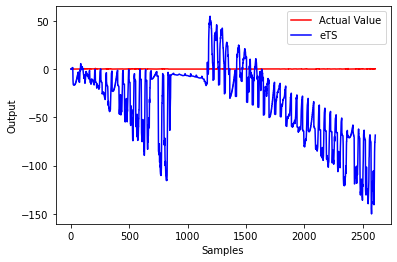

In [92]:
# Plot the graphic of the actual time series and the eTS predictions
plt.plot(y_test, label='Actual Value', color='red')
plt.plot(OutputTestDenormalized, color='blue', label='eTS')
plt.ylabel('Output')
plt.xlabel('Samples')
plt.legend()
plt.show()

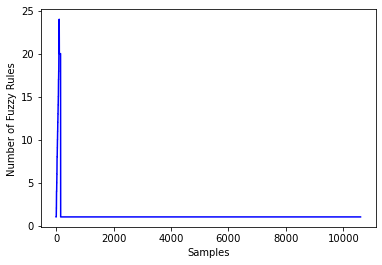

In [93]:
# Plot the evolution of the model's rule
plt.plot(Rules, color='blue')
plt.ylabel('Number of Fuzzy Rules')
plt.xlabel('Samples')
plt.show()